In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
os.getcwd()
os.chdir('/Users/susovan/Desktop/springboard doc')

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('adult.csv')


In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
a=df.nunique()
a

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [8]:
df = df.replace(to_replace = '?', value =np.nan) 

In [9]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [10]:
df['workclass'].value_counts

<bound method IndexOpsMixin.value_counts of 0             Private
1             Private
2           Local-gov
3             Private
4                 NaN
             ...     
48837         Private
48838         Private
48839         Private
48840         Private
48841    Self-emp-inc
Name: workclass, Length: 48842, dtype: object>

In [11]:
df['occupation'].value_counts

<bound method IndexOpsMixin.value_counts of 0        Machine-op-inspct
1          Farming-fishing
2          Protective-serv
3        Machine-op-inspct
4                      NaN
               ...        
48837         Tech-support
48838    Machine-op-inspct
48839         Adm-clerical
48840         Adm-clerical
48841      Exec-managerial
Name: occupation, Length: 48842, dtype: object>

In [12]:
df['native-country'].value_counts

<bound method IndexOpsMixin.value_counts of 0        United-States
1        United-States
2        United-States
3        United-States
4        United-States
             ...      
48837    United-States
48838    United-States
48839    United-States
48840    United-States
48841    United-States
Name: native-country, Length: 48842, dtype: object>

In [13]:
df['native-country'].unique()

array(['United-States', nan, 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [14]:
is_NaN = df['workclass'].isna()
row_has_NaN = is_NaN
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

       age workclass  fnlwgt     education  educational-num  \
4       18       NaN  103497  Some-college               10   
6       29       NaN  227026       HS-grad                9   
13      58       NaN  299831       HS-grad                9   
22      72       NaN  132015       7th-8th                4   
35      65       NaN  191846       HS-grad                9   
...    ...       ...     ...           ...              ...   
48811   35       NaN  320084     Bachelors               13   
48812   30       NaN   33811     Bachelors               13   
48820   71       NaN  287372     Doctorate               16   
48822   41       NaN  202822       HS-grad                9   
48823   72       NaN  129912       HS-grad                9   

           marital-status occupation   relationship                race  \
4           Never-married        NaN      Own-child               White   
6           Never-married        NaN      Unmarried               Black   
13     Married-civ

In [15]:
rows_with_NaN['occupation'].unique()

array([nan], dtype=object)

In [16]:
df = df.dropna(subset=['workclass'])

In [17]:
df.shape

(46043, 15)

In [18]:
df.isna().sum()

age                  0
workclass            0
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation          10
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     811
income               0
dtype: int64

In [19]:
is_NaN = df['occupation'].isna()
row_has_NaN = is_NaN
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

       age     workclass  fnlwgt     education  educational-num  \
8785    17  Never-worked  131593          11th                7   
11607   20  Never-worked  273905       HS-grad                9   
13898   18  Never-worked  162908          11th                7   
21642   18  Never-worked  206359          10th                6   
27126   23  Never-worked  188535       7th-8th                4   
31053   17  Never-worked  237272          10th                6   
36618   18  Never-worked  157131          11th                7   
39513   20  Never-worked  462294  Some-college               10   
48585   30  Never-worked  176673       HS-grad                9   
48595   18  Never-worked  153663  Some-college               10   

              marital-status occupation    relationship   race  gender  \
8785           Never-married        NaN       Own-child  Black  Female   
11607  Married-spouse-absent        NaN  Other-relative  White    Male   
13898          Never-married        NaN 

In [20]:
rows_with_NaN['workclass'].unique()

array(['Never-worked'], dtype=object)

In [21]:
df = df.dropna(subset=['occupation'])

In [22]:
df['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay'], dtype=object)

In [23]:
df.isna().sum()

age                  0
workclass            0
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     811
income               0
dtype: int64

In [24]:
is_NaN = df['native-country'].isna()
row_has_NaN = is_NaN
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

       age         workclass  fnlwgt  education  educational-num  \
19      40           Private   85019  Doctorate               16   
65      41           Private  109912  Bachelors               13   
83      44      Self-emp-inc  223881    HS-grad                9   
188     34         State-gov  513100  Bachelors               13   
253     42       Federal-gov  177937  Bachelors               13   
...    ...               ...     ...        ...              ...   
48694   45           Private  199590    5th-6th                3   
48730   44      Self-emp-inc   71556    Masters               14   
48750   58      Self-emp-inc  181974  Doctorate               16   
48773   42  Self-emp-not-inc  217597    HS-grad                9   
48791   39           Private  107302    HS-grad                9   

              marital-status         occupation   relationship  \
19        Married-civ-spouse     Prof-specialty        Husband   
65             Never-married      Other-service  No

In [25]:
df['native-country'] = df['native-country'].fillna(df['native-country'].mode()[0])

In [26]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [27]:
df = df.reset_index()
df

,index,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46028,48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
46029,48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
46030,48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
46031,48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [28]:
#percent of unique values per column
pd.DataFrame(a/len(df) * 100,columns = ['percent'])

,percent
age,0.160754
workclass,0.019551
fnlwgt,61.962071
education,0.034758
educational-num,0.034758
marital-status,0.015206
occupation,0.032585
relationship,0.013034
race,0.010862
gender,0.004345


In [29]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF


,index,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [30]:
df.dtypes

index               int64
age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [31]:

df = df.drop(['index'],axis=1)

In [32]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [33]:
df['income']=np.where(df["income"] == "<=50K", 0, 1)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46028,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
46029,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
46030,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
46031,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [34]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income              int64
dtype: object

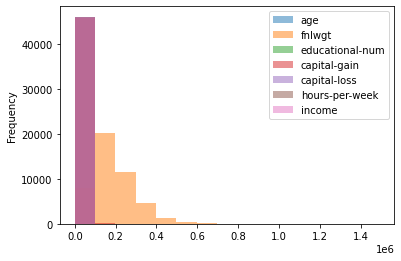

In [35]:
_ = df.plot.hist(bins=15, alpha=0.50)


Text(0, 0.5, 'Frequency')

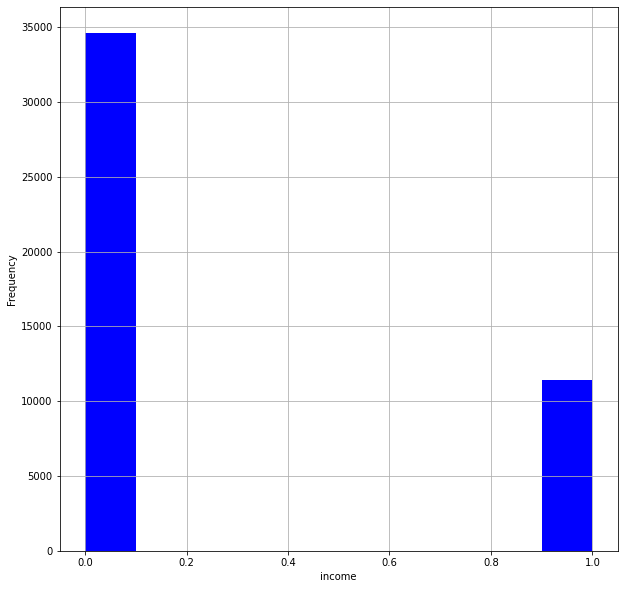

In [36]:
df['income'].hist(bins=10,figsize =(10,10), color='b')
plt.xlabel('income')
plt.ylabel('Frequency')

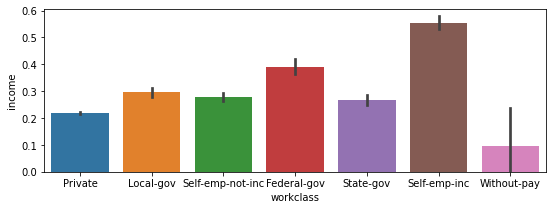

In [37]:
plt.figure(figsize=(9, 3))
sns.barplot(x = 'workclass',
            y = 'income',
            data = df)
 
plt.show()


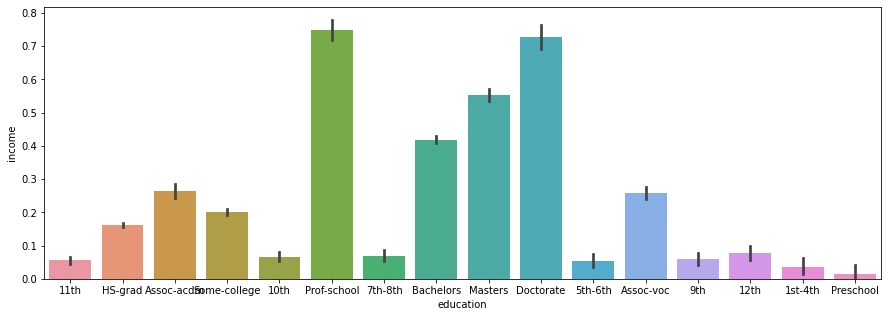

In [38]:
plt.figure(figsize=(15, 5))
sns.barplot(x = 'education',
            y = 'income',
            data = df)
 
plt.show()


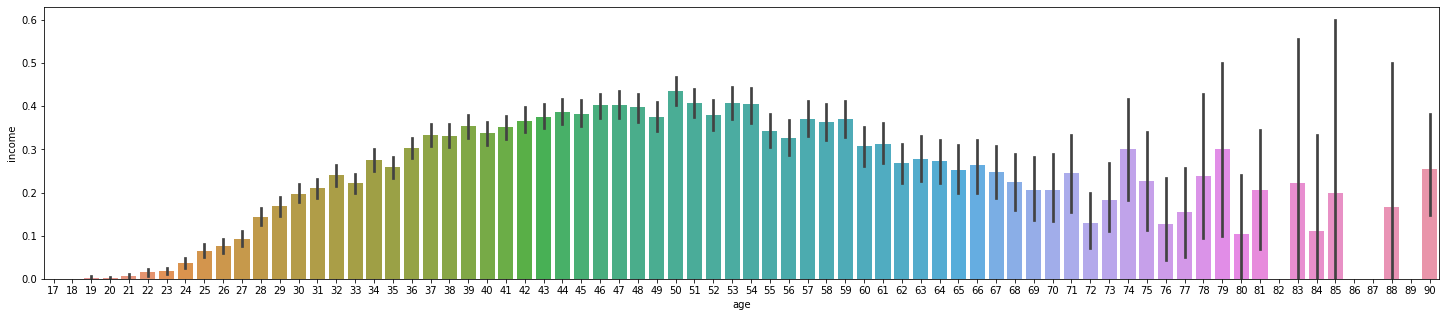

In [39]:
plt.figure(figsize=(25, 5))
sns.barplot(x = 'age',
            y = 'income',
            data = df)
 
plt.show()


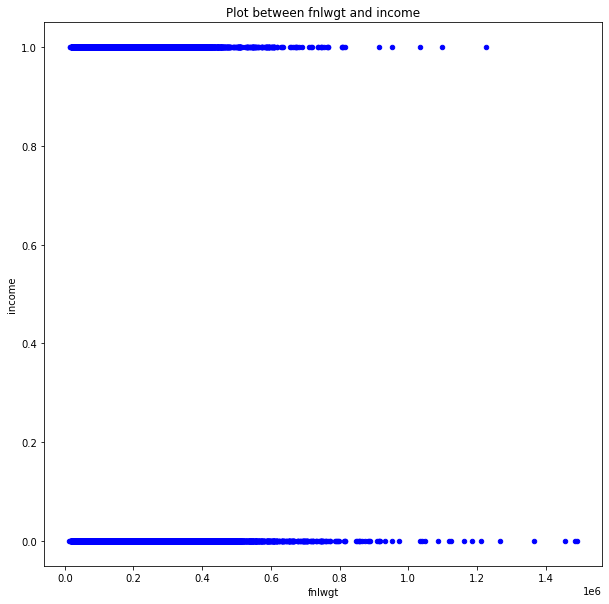

In [40]:
#plt.figure(figsize=(25, 5))
#sns.barplot(x = 'fnlwgt',y = 'income',data = df)
 
df.plot.scatter( x='fnlwgt', y='income',title= "Plot between fnlwgt and income", figsize =(10,10), color='b');
plt.xlabel('fnlwgt')
plt.ylabel('income')
plt.show()

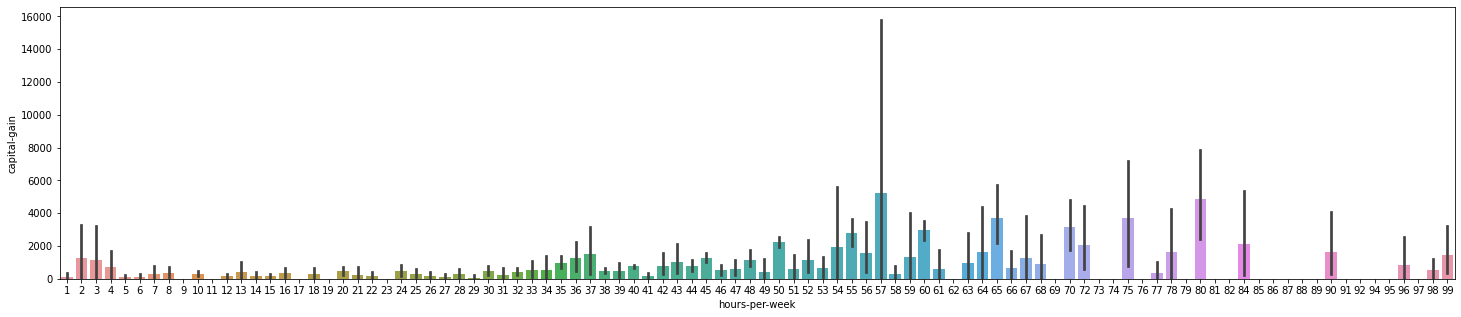

In [41]:
plt.figure(figsize=(25, 5))
sns.barplot(x = 'hours-per-week',
            y = 'capital-gain',
            data = df)
 
plt.show()


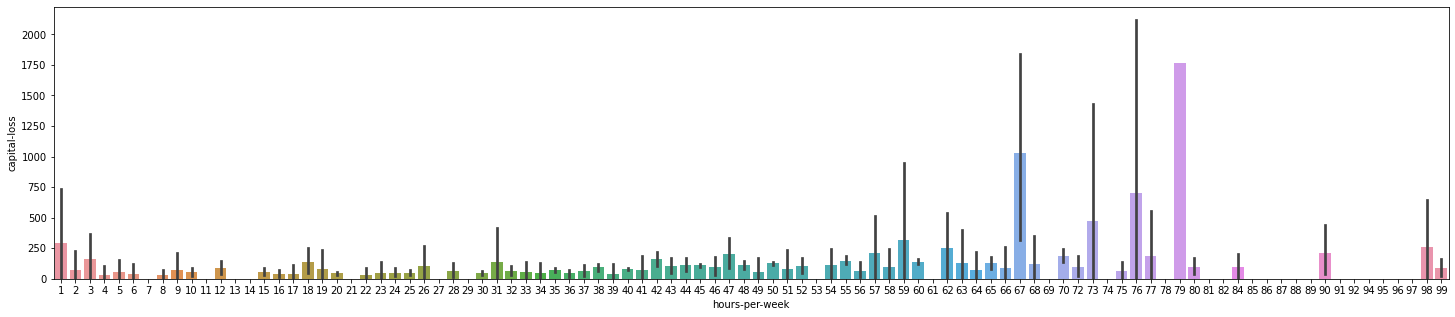

In [42]:
plt.figure(figsize=(25, 5))
sns.barplot(x = 'hours-per-week',
            y = 'capital-loss',
            data = df)
 
plt.show()



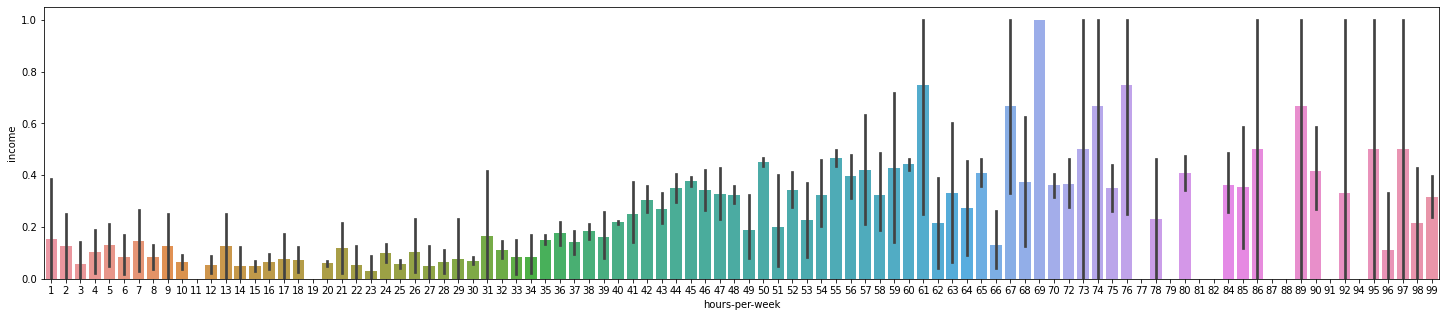

In [43]:
plt.figure(figsize=(25, 5))
sns.barplot(x = 'hours-per-week',
            y = 'income',
            data = df)
 
plt.show()


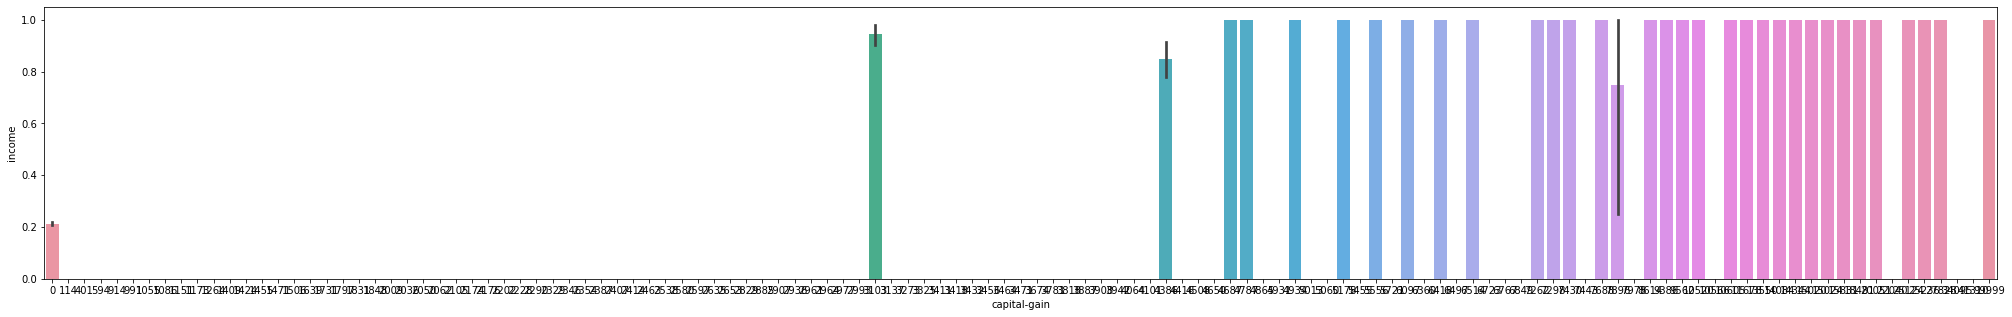

In [44]:
plt.figure(figsize=(35, 5))
sns.barplot(y = 'income',
            x = 'capital-gain',
            data = df)
 
plt.show()

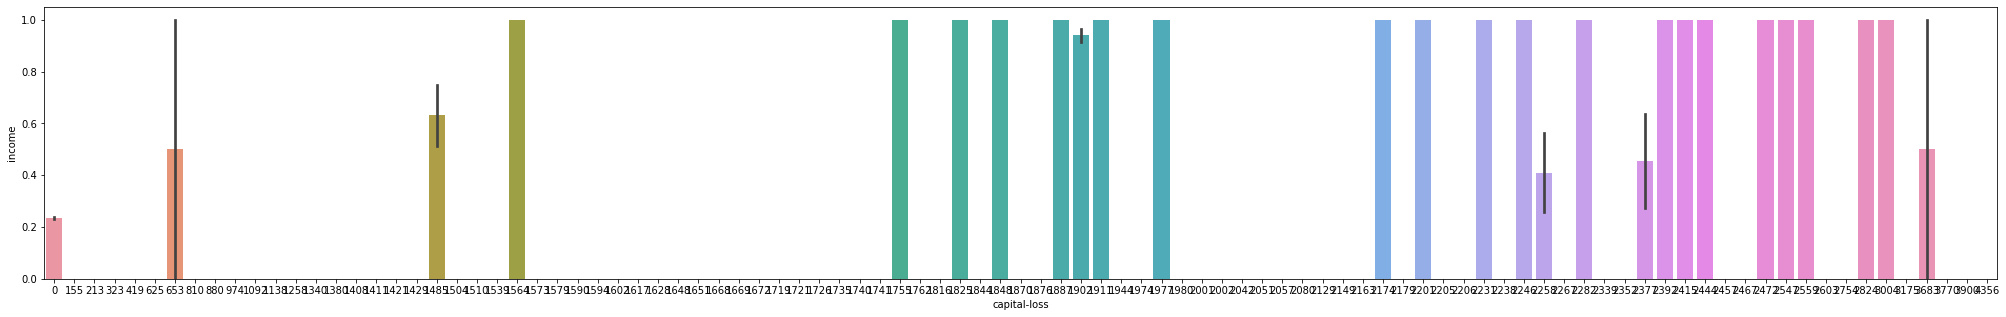

In [45]:
plt.figure(figsize=(35, 5))
sns.barplot(y = 'income',
            x = 'capital-loss',
            data = df)
 
plt.show()

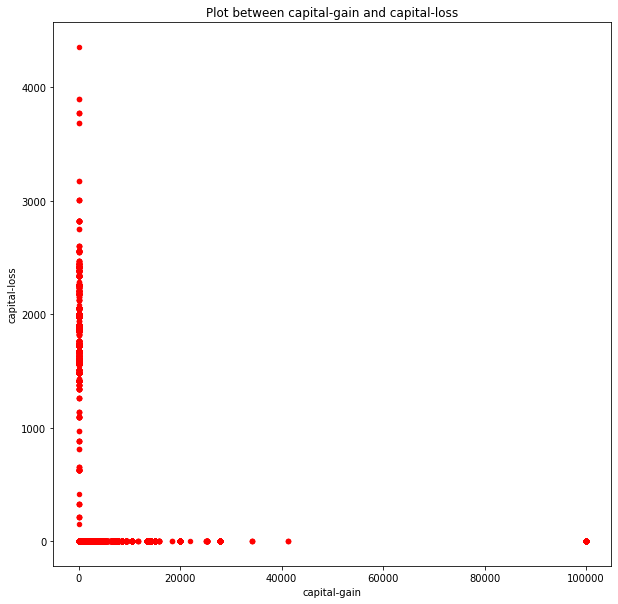

In [46]:
df.plot.scatter(x='capital-gain', y='capital-loss', title= "Plot between capital-gain and capital-loss", figsize =(10,10), color='r');
plt.xlabel('capital-gain')
plt.ylabel('capital-loss')
plt.show()

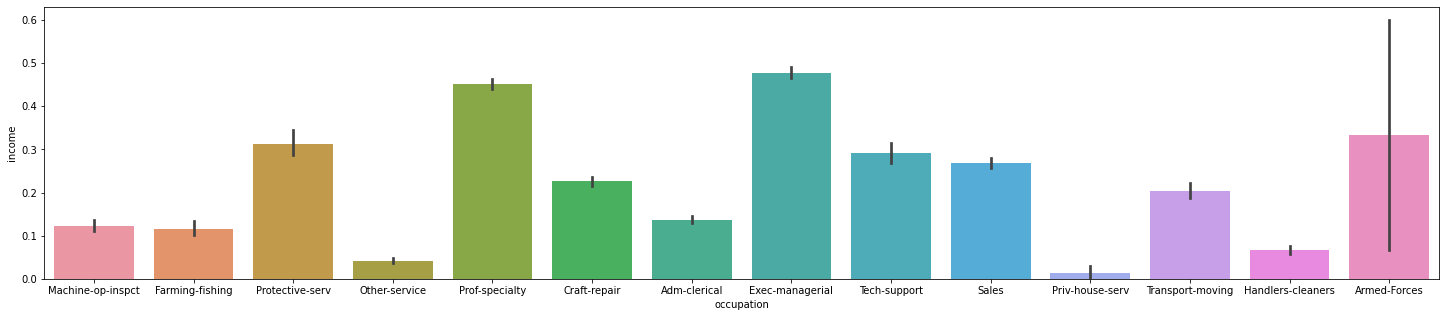

In [47]:
plt.figure(figsize=(25, 5))
sns.barplot(x = 'occupation',
            y = 'income',
            data = df)
 
plt.show()


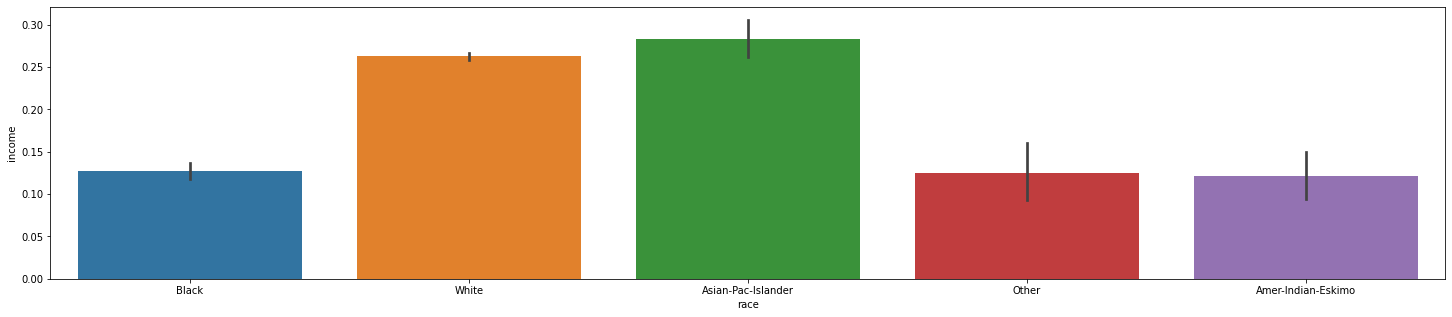

In [48]:
plt.figure(figsize=(25, 5))
sns.barplot(x = 'race',
            y = 'income',
            data = df)
 
plt.show()

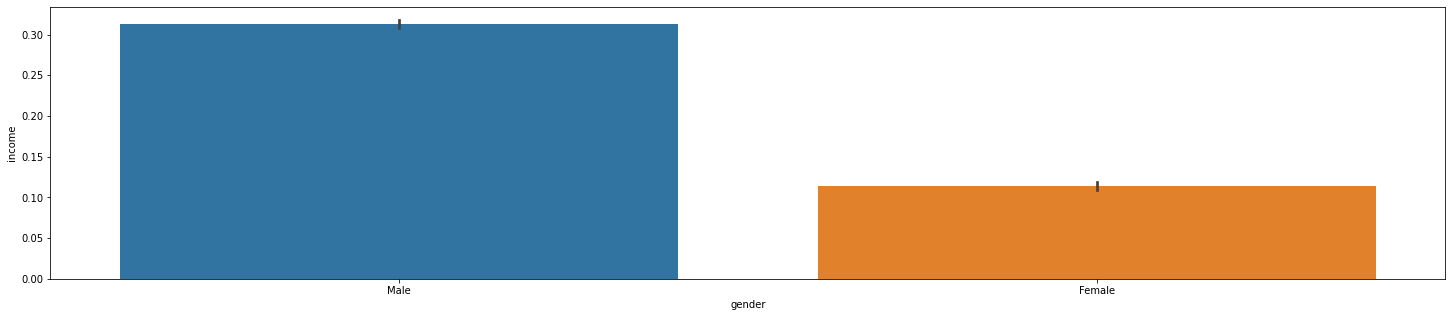

In [49]:
plt.figure(figsize=(25, 5))
sns.barplot(x = 'gender',
            y = 'income',
            data = df)
 
plt.show()

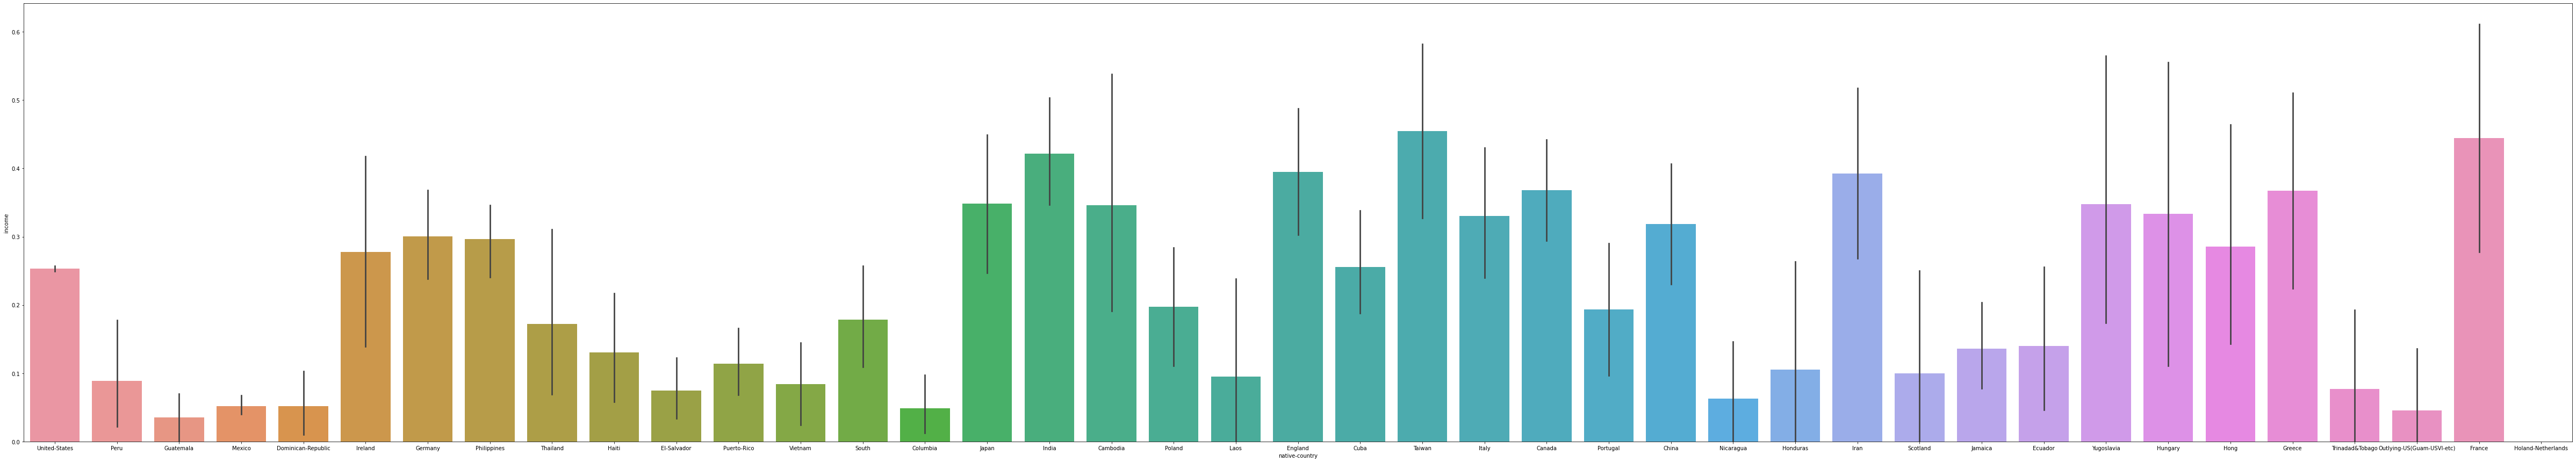

In [50]:
plt.figure(figsize=(85, 15))
sns.barplot(x = 'native-country',
            y = 'income',
            data = df)
 
plt.show()
 

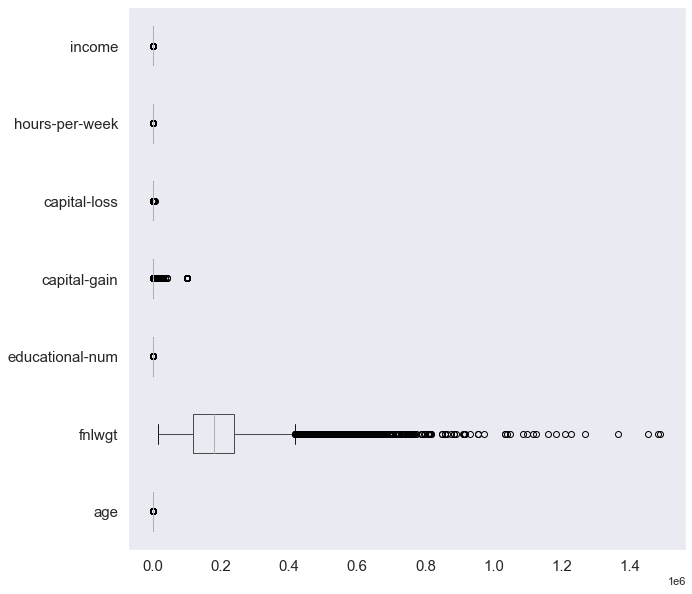

In [59]:
df_box = df.boxplot(grid=False, vert=False,fontsize=15, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1335751d0>,
      dtype=object)

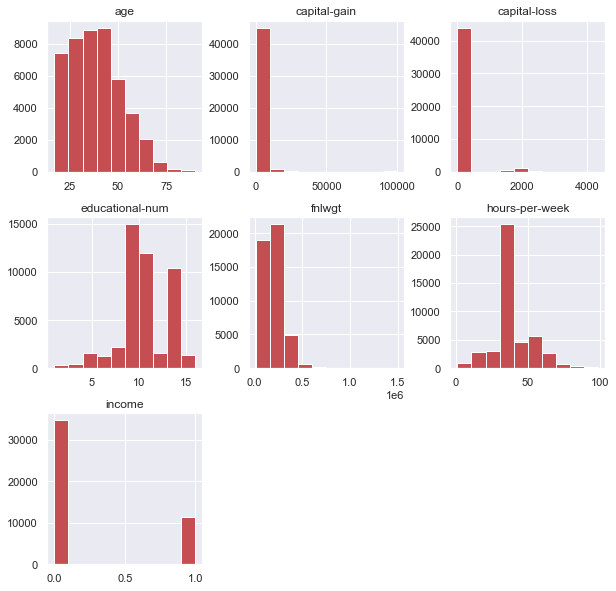

In [60]:
df.hist(bins=10,figsize =(10,10), color='r')

In [52]:
#Apply outlier removal using the Interquartile range or replacement
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR


age                    19.0
fnlwgt             120259.0
educational-num         4.0
capital-gain            0.0
capital-loss            0.0
hours-per-week          5.0
income                  0.0
dtype: float64

In [53]:
dfno = df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]

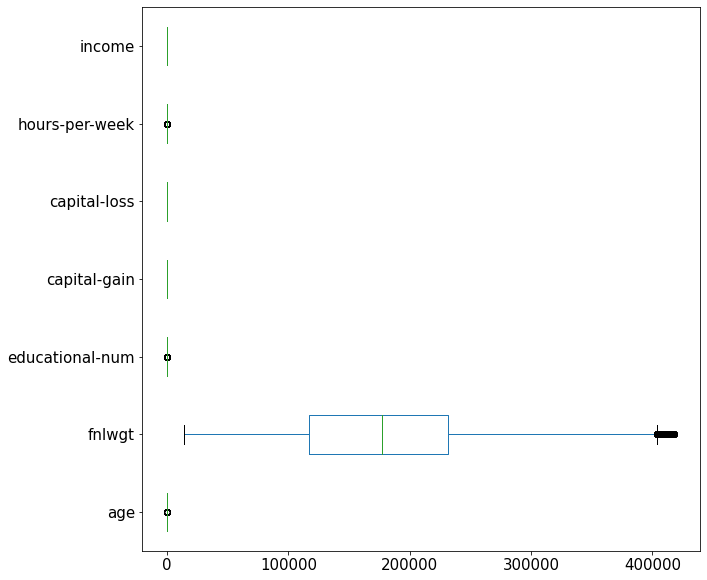

In [54]:
df_box = dfno.boxplot(grid=False, vert=False,fontsize=15, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131b6c410>,
      dtype=object)

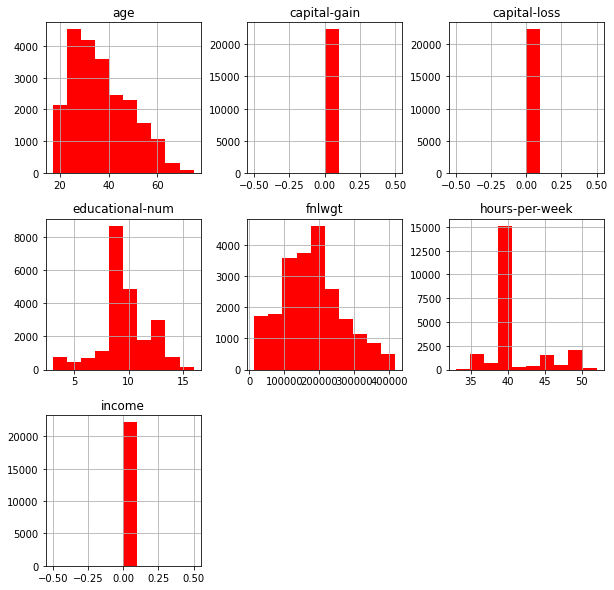

In [55]:
dfno.hist(bins=10,figsize =(10,10), color='r')

Correlation between various features


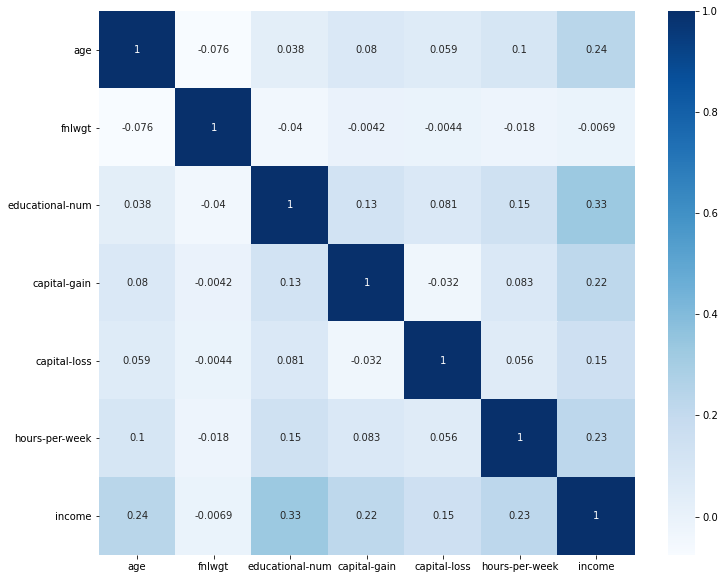

In [56]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(df.corr(), annot=True,cmap ='Blues')

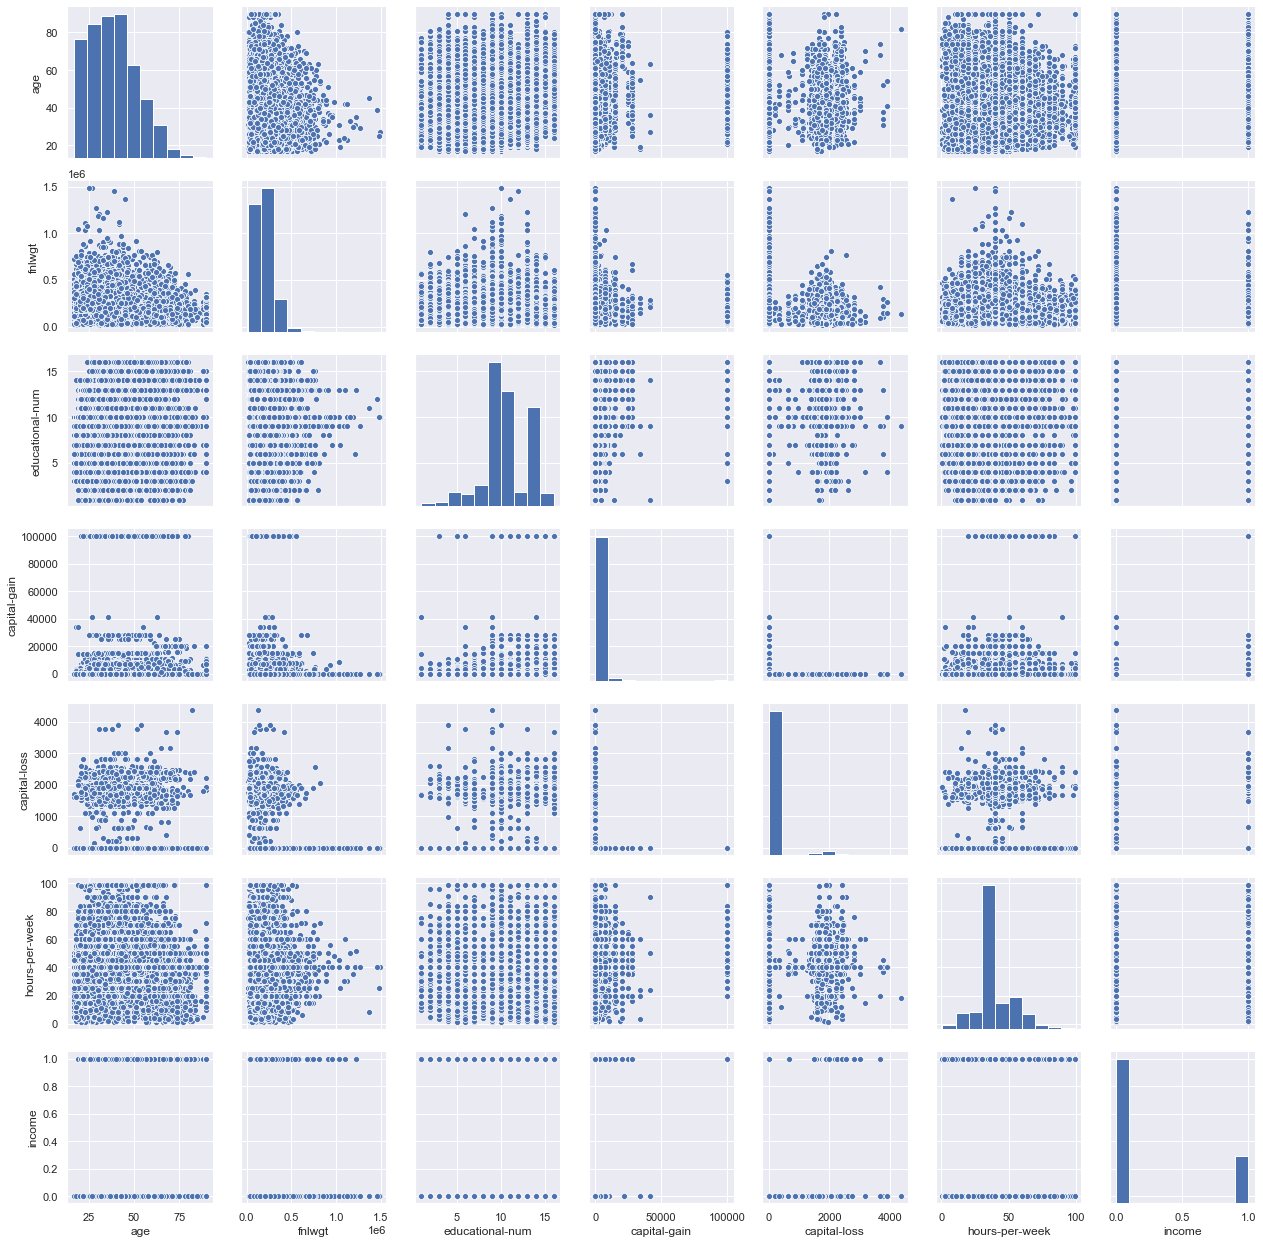

In [57]:
sns.set()
sns.pairplot(df)
plt.show()

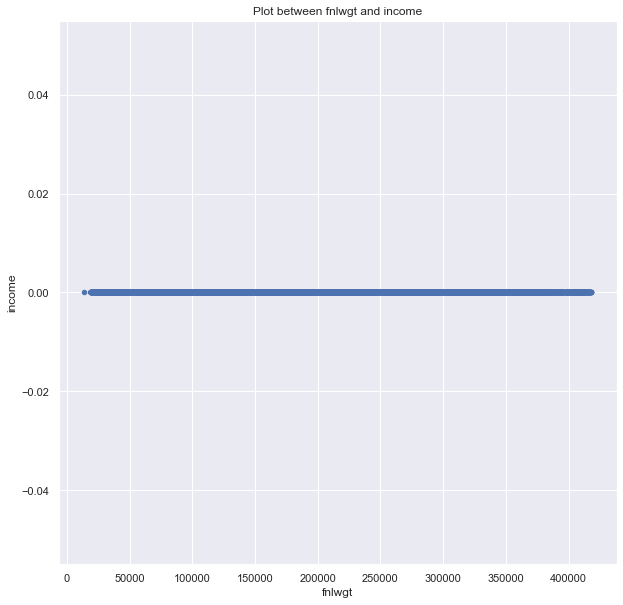

In [58]:
dfno.plot.scatter( x='fnlwgt', y='income',title= "Plot between fnlwgt and income", figsize =(10,10), color='b');
plt.xlabel('fnlwgt')
plt.ylabel('income')
plt.show()

In [ ]:
#The questions you asked 
#The trends you investigated
#The resulting visualizations and conclusions

In [ ]:
How the different feature are contributing to income of the country.
I plotted the histograms,bar plot ,line plot ,box plotto find different relations among the attributes
as well as outliers and how they are affecting the results.
We see from the plot that fnlwgt does not have much impact on income.We see that workclass,education,age,
gender,race,occupation,native country are the factors which affects income.